<a href="https://colab.research.google.com/github/gunacodee/DLT/blob/main/Ex_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0, Loss: 0.9902
Epoch 100, Loss: 0.0020
Epoch 200, Loss: 0.0010
Epoch 300, Loss: 0.0007
Epoch 400, Loss: 0.0005
Epoch 500, Loss: 0.0004
Epoch 600, Loss: 0.0003
Epoch 700, Loss: 0.0003
Epoch 800, Loss: 0.0002
Epoch 900, Loss: 0.0002
Test Accuracy: 100.00%


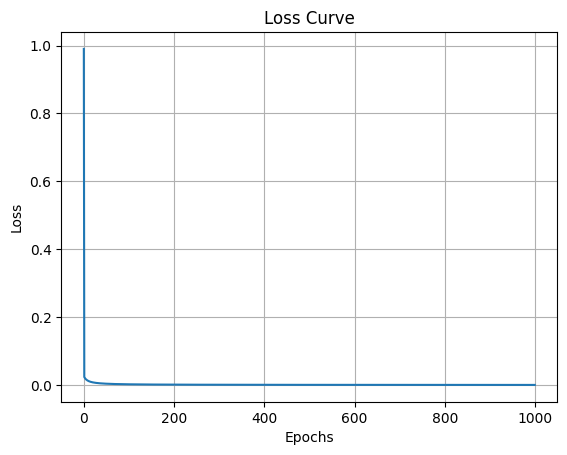

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Load dataset
data = load_iris()
X = data.data
y = data.target

# 2. Convert to binary classification (e.g., class 0 = Setosa vs Others)
y = (y == 0).astype(int).reshape(-1, 1)

# 3. Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 4. Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Initialize parameters
input_dim = X.shape[1]
hidden_dim = 10
output_dim = 1

W1 = np.random.randn(input_dim, hidden_dim)
b1 = np.zeros((1, hidden_dim))
W2 = np.random.randn(hidden_dim, output_dim)
b2 = np.zeros((1, output_dim))

# 6. Activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def tanh_derivative(a):
    return 1 - np.power(a, 2)

# 7. Training parameters
epochs = 1000
lr = 0.01
losses = []

# 8. Training loop
for epoch in range(epochs):
    # Forward pass
    Z1 = np.dot(X_train, W1) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)

    # Loss computation
    loss = -np.mean(y_train * np.log(A2 + 1e-9) + (1 - y_train) * np.log(1 - A2 + 1e-9))
    losses.append(loss)

    # Backpropagation
    dZ2 = A2 - y_train
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * tanh_derivative(A1)
    dW1 = np.dot(X_train.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # Update weights and biases
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# 9. Testing phase
Z1_test = np.dot(X_test, W1) + b1
A1_test = np.tanh(Z1_test)
Z2_test = np.dot(A1_test, W2) + b2
A2_test = sigmoid(Z2_test)

y_pred = (A2_test > 0.5).astype(int)
accuracy = np.mean(y_pred == y_test) * 100
print(f"Test Accuracy: {accuracy:.2f}%")

# 10. Plot the loss curve
plt.plot(losses)
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()
